<a href="https://colab.research.google.com/github/RayenBoukhchina/Customer-Segmentation/blob/main/TP3_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


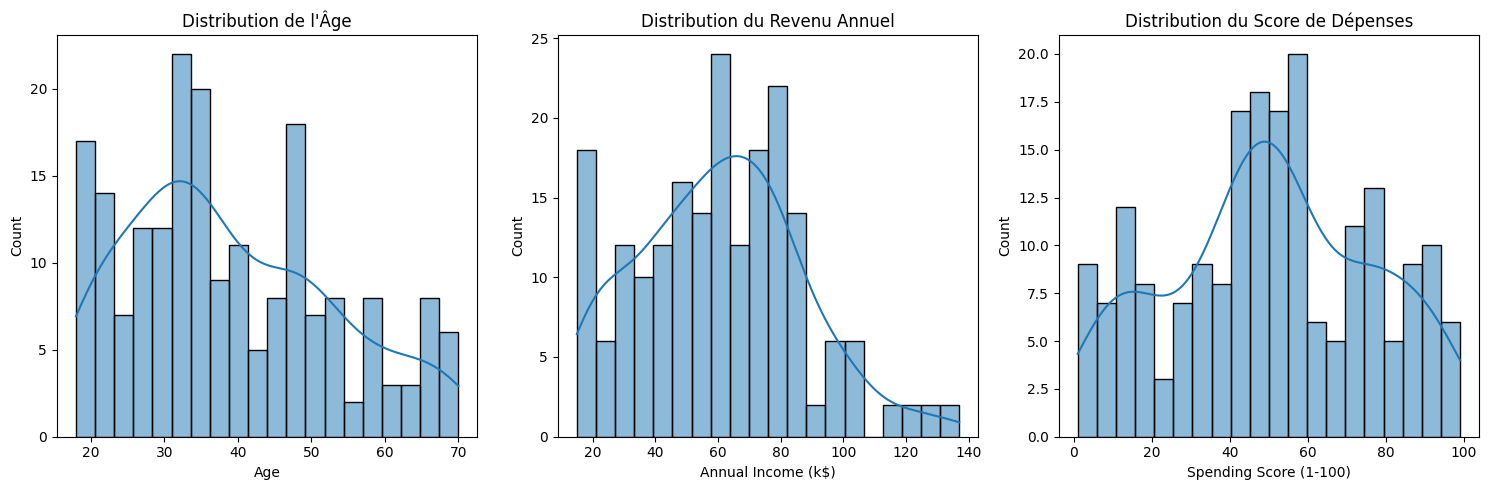

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'Âge')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution du Revenu Annuel')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution du Score de Dépenses')

plt.tight_layout()
plt.show()

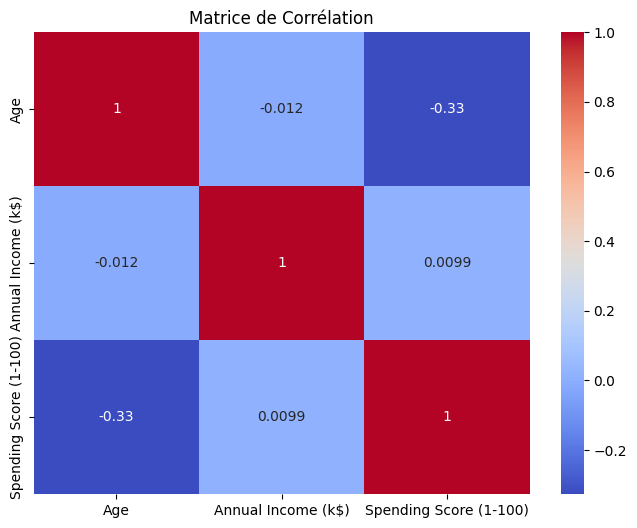

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertias = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    if k > 1:  # Le score de silhouette n'est pas défini pour k=1
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


Taille de inertias: 9
Taille de silhouette_scores: 9


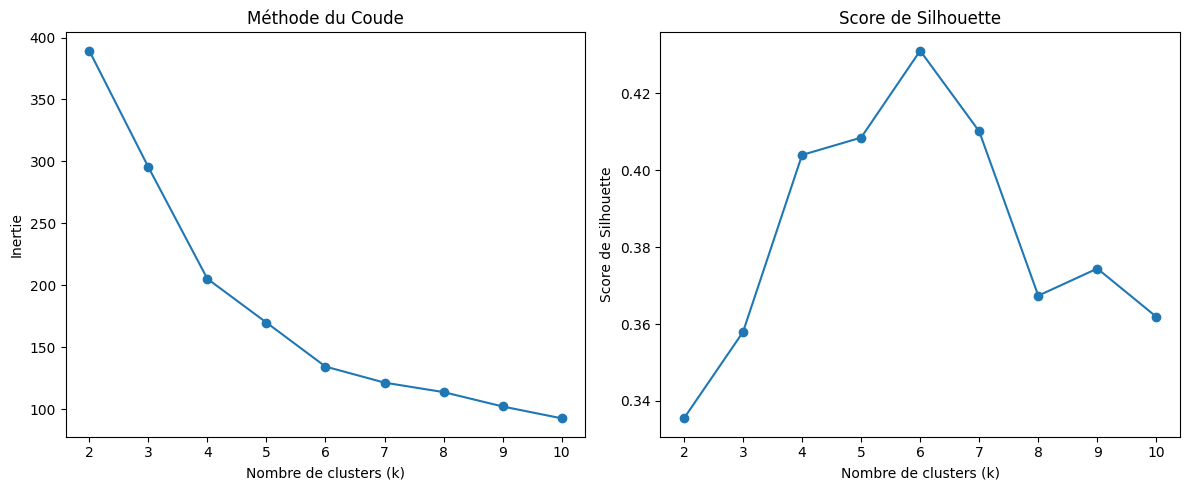

In [17]:
plt.figure(figsize=(12, 5))

print(f"Taille de inertias: {len(inertias)}")
print(f"Taille de silhouette_scores: {len(silhouette_scores)}")

if len(inertias) == 9:
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertias, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Inertie')
    plt.title('Méthode du Coude')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de Silhouette')
    plt.title('Score de Silhouette')

elif len(inertias) == 10:
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Inertie')
    plt.title('Méthode du Coude')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de Silhouette')
    plt.title('Score de Silhouette')

else:
    raise ValueError("La taille des données ne correspond pas aux attentes")

plt.tight_layout()
plt.show()

In [25]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [23]:
df['Cluster'] = kmeans.labels_


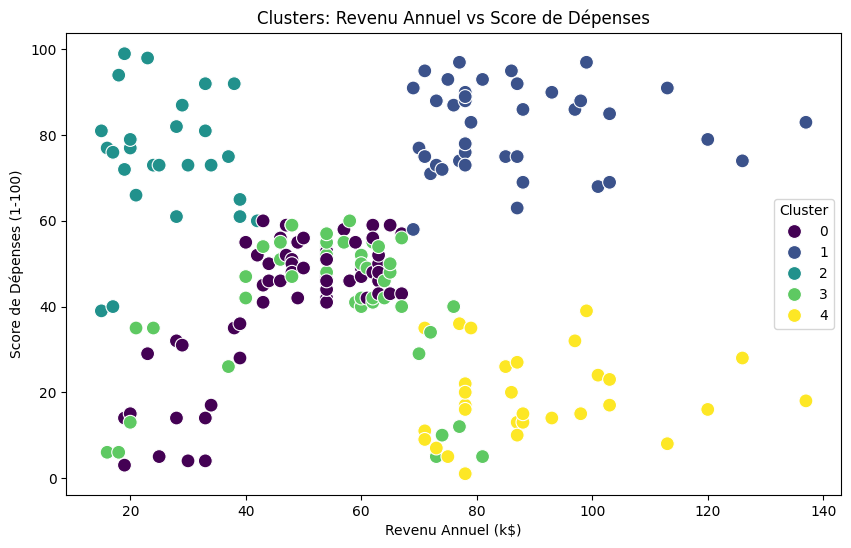

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.title('Clusters: Revenu Annuel vs Score de Dépenses')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Score de Dépenses (1-100)')
plt.show()

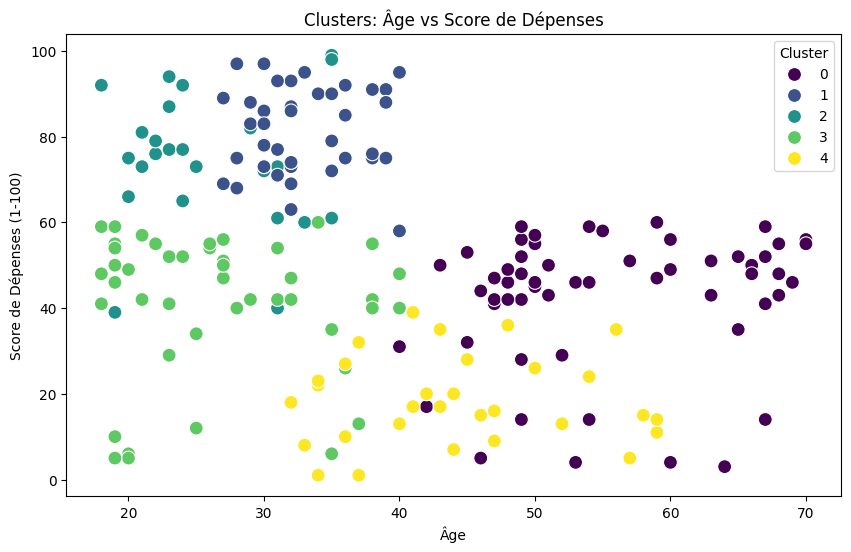

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.title('Clusters: Âge vs Score de Dépenses')
plt.xlabel('Âge')
plt.ylabel('Score de Dépenses (1-100)')
plt.show()

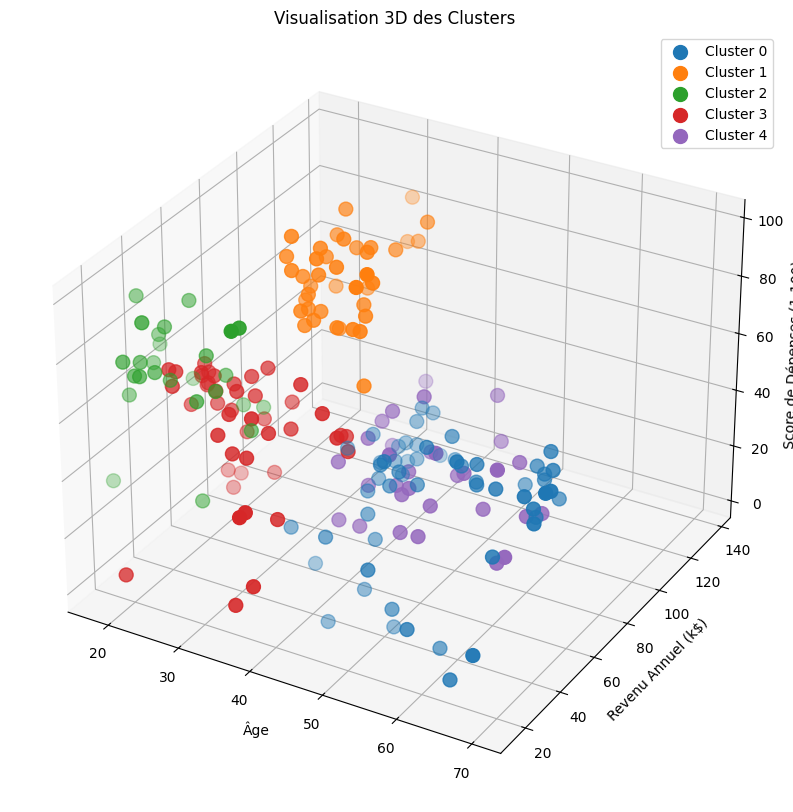

In [28]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'],
               cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}', s=100)

ax.set_xlabel('Âge')
ax.set_ylabel('Revenu Annuel (k$)')
ax.set_zlabel('Score de Dépenses (1-100)')
ax.set_title('Visualisation 3D des Clusters')
plt.legend()
plt.show()


In [30]:
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.mode()[0],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\n=== Analyse des Clusters ===")
print(cluster_analysis)


=== Analyse des Clusters ===
               Age  Annual Income (k$)  Spending Score (1-100)  Gender  Count
Cluster                                                                      
0        55.275862           47.620690               41.706897  Female     58
1        32.875000           86.100000               81.525000  Female     40
2        25.769231           26.115385               74.846154  Female     26
3        26.733333           54.311111               40.911111  Female     45
4        44.387097           89.774194               18.483871    Male     31


In [31]:
cluster_profiles = []
for cluster in range(optimal_k):
    profile = {
        'Cluster': cluster,
        'Taille': cluster_analysis.loc[cluster, 'Count'],
        'Age moyen': round(cluster_analysis.loc[cluster, 'Age'], 1),
        'Revenu moyen': round(cluster_analysis.loc[cluster, 'Annual Income (k$)'], 1),
        'Score de dépenses moyen': round(cluster_analysis.loc[cluster, 'Spending Score (1-100)'], 1),
        'Genre dominant': cluster_analysis.loc[cluster, 'Gender']
    }
    cluster_profiles.append(profile)

profiles_df = pd.DataFrame(cluster_profiles)
print("\n=== Profils des Clusters ===")
print(profiles_df)


=== Profils des Clusters ===
   Cluster  Taille  Age moyen  Revenu moyen  Score de dépenses moyen  \
0        0      58       55.3          47.6                     41.7   
1        1      40       32.9          86.1                     81.5   
2        2      26       25.8          26.1                     74.8   
3        3      45       26.7          54.3                     40.9   
4        4      31       44.4          89.8                     18.5   

  Genre dominant  
0         Female  
1         Female  
2         Female  
3         Female  
4           Male  


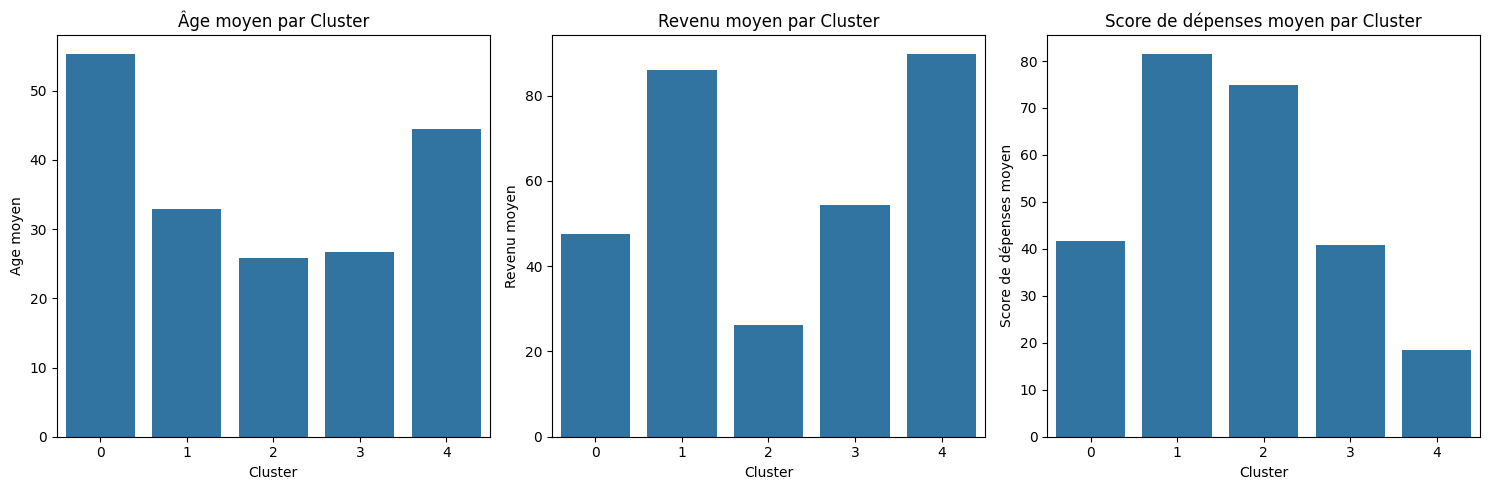

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=profiles_df, x='Cluster', y='Age moyen')
plt.title('Âge moyen par Cluster')

plt.subplot(1, 3, 2)
sns.barplot(data=profiles_df, x='Cluster', y='Revenu moyen')
plt.title('Revenu moyen par Cluster')

plt.subplot(1, 3, 3)
sns.barplot(data=profiles_df, x='Cluster', y='Score de dépenses moyen')
plt.title('Score de dépenses moyen par Cluster')

plt.tight_layout()
plt.show()